# **NVIDIA, AMD and INTEL Stock Datasets**

**Dataset Overview:** These datasets contains historical stock price data for NVIDIA Corporation, Advanced Micro Devices Inc. (AMD), and Intel Corporation which all are leading technology company specializing in GPUs, AI, and computer hardware. The data spans [03/24/2015 to 03/21/2025] and includes key metrics like opening price, closing price, trading volume, high and low.

**Data Source:** Historical Data from Nasdaq's Historical Quotes.

**Why Use This Dataset?** For Financial trend analysis, Predictive modeling using machine learning, Stock price forecasting with time-series models, Insights into market behavior and many more.

**Data Summary:**

Date Range: March 24, 2015 to March 21, 2025

Total Trading Days: 2515 (2515 Rows and 6 Columns)

Key Columns: Date, Open, High, Low, Close, Volume



## **Load the Datasets**

In [4]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [5]:
# Loading the datasets of NVIDIA, AMD and INTEL STOCK

nvidia_df = pd.read_csv('NVIDIA_STOCK.csv', skiprows=1, names=['Date', 'Close', 'Volume', 'Open', 'High', 'Low'])
amd_df = pd.read_csv('AMD_STOCK.csv', skiprows=1, names=['Date', 'Close', 'Volume', 'Open', 'High', 'Low'])
intel_df = pd.read_csv('INTEL_STOCK.csv', skiprows=1, names=['Date', 'Close', 'Volume', 'Open', 'High', 'Low'])

print(f"\nNVIDIA: \n{nvidia_df.head()}")
print(f"\nAMD: \n{amd_df.head()}")
print(f"\nINTEL: \n{intel_df.head()}")


NVIDIA: 
         Date    Close     Volume     Open      High      Low
0  03/21/2025  $117.70  266498500  $116.94   $117.99  $115.42
1  03/20/2025  $118.53  248829700  $116.55   $120.20  $116.47
2  03/19/2025  $117.52  273426200  $117.27  $120.445  $115.68
3  03/18/2025  $115.43  299686900  $118.00   $119.02  $114.54
4  03/17/2025  $119.53  255501500  $122.74   $122.89  $118.03

AMD: 
         Date    Close    Volume     Open     High      Low
0  03/21/2025  $106.44  30767940  $105.33  $107.25  $104.33
1  03/20/2025  $107.14  26871840  $105.12  $108.26  $105.12
2  03/19/2025  $106.23  32287500  $104.42  $107.90  $101.96
3  03/18/2025  $103.51  27152830  $103.85  $104.55  $102.97
4  03/17/2025  $104.59  43689520  $102.60  $106.15  $102.60

INTEL: 
         Date   Close     Volume    Open      High     Low
0  03/21/2025  $24.26   94110710  $23.60    $24.70  $23.49
1  03/20/2025  $23.96   68937580  $23.77    $24.31  $23.73
2  03/19/2025  $24.12  135491400  $24.90  $25.2299  $24.03
3  03/

In [6]:
# NVIDIA Dataset Info and Describe

nvidia_df.describe(), nvidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2515 non-null   object
 1   Close   2515 non-null   object
 2   Volume  2515 non-null   int64 
 3   Open    2515 non-null   object
 4   High    2515 non-null   object
 5   Low     2515 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.0+ KB


(             Volume
 count  2.515000e+03
 mean   4.678299e+08
 std    2.520033e+08
 min    5.244924e+07
 25%    3.064822e+08
 50%    4.150393e+08
 75%    5.634640e+08
 max    3.688132e+09,
 None)

## **Clean and transform datasets**

In [7]:
# Convert Date to datetime

nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])
amd_df['Date'] = pd.to_datetime(amd_df['Date'])
intel_df['Date'] = pd.to_datetime(intel_df['Date'])

In [8]:
# Clean 'Close' column, remove '$' and convert to float

nvidia_df['Close'] = nvidia_df['Close'].str.replace('$', '', regex=False).astype(float)
amd_df['Close'] = amd_df['Close'].str.replace('$', '', regex=False).astype(float)
intel_df['Close'] = intel_df['Close'].str.replace('$', '', regex=False).astype(float)


# Clean 'Open' column, remove '$' and convert to float

nvidia_df['Open'] = nvidia_df['Open'].str.replace('$', '', regex=False).astype(float)
amd_df['Open'] = amd_df['Open'].str.replace('$', '', regex=False).astype(float)
intel_df['Open'] = intel_df['Open'].str.replace('$', '', regex=False).astype(float)


# Clean 'High' column, remove '$' and convert to float

nvidia_df['High'] = nvidia_df['High'].str.replace('$', '', regex=False).astype(float)
amd_df['High'] = amd_df['High'].str.replace('$', '', regex=False).astype(float)
intel_df['High'] = intel_df['High'].str.replace('$', '', regex=False).astype(float)


# Clean 'Low' column, remove '$' and convert to float

nvidia_df['Low'] = nvidia_df['Low'].str.replace('$', '', regex=False).astype(float)
amd_df['Low'] = amd_df['Low'].str.replace('$', '', regex=False).astype(float)
intel_df['Low'] = intel_df['Low'].str.replace('$', '', regex=False).astype(float)

In [9]:
# Sort by Date ascending

nvidia_df = nvidia_df.sort_values(by='Date').reset_index(drop=True)
amd_df = amd_df.sort_values(by='Date').reset_index(drop=True)
intel_df = intel_df.sort_values(by='Date').reset_index(drop=True)

In [10]:
# Handle missing values

nvidia_df = nvidia_df.dropna().reset_index(drop=True)
amd_df = amd_df.dropna().reset_index(drop=True)
intel_df = intel_df.dropna().reset_index(drop=True)

nvidia_df.info(), amd_df.info(), intel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2515 non-null   datetime64[ns]
 1   Close   2515 non-null   float64       
 2   Volume  2515 non-null   int64         
 3   Open    2515 non-null   float64       
 4   High    2515 non-null   float64       
 5   Low     2515 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2515 non-null   datetime64[ns]
 1   Close   2515 non-null   float64       
 2   Volume  2515 non-null   int64         
 3   Open    2515 non-null   float64       
 4   High    2515 non-null   float64       
 5   Low     2515 non-null   float64       
dtypes: datet

(None, None, None)

In [11]:
# Prep and tranformation of datasets for EDA visualizations

# For NVIDIA dataset
nvidia_df['Year'] = nvidia_df['Date'].dt.year
nvidia_df['Month'] = nvidia_df['Date'].dt.month
nvidia_df['Volume in Millions USD'] = (nvidia_df['Volume'] * nvidia_df['Close']) / 1e6
nvidia_df['Company'] = 'NVIDIA'

# For AMD dataset
amd_df['Year'] = amd_df['Date'].dt.year
amd_df['Month'] = amd_df['Date'].dt.month
amd_df['Volume in Millions USD'] = (amd_df['Volume'] * amd_df['Close']) / 1e6
amd_df['Company'] = 'AMD'

# For INTEL dataset
intel_df['Year'] = intel_df['Date'].dt.year
intel_df['Month'] = intel_df['Date'].dt.month
intel_df['Volume in Millions USD'] = (intel_df['Volume'] * intel_df['Close']) / 1e6
intel_df['Company'] = 'INTEL'

nvidia_df.info(), nvidia_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2515 non-null   datetime64[ns]
 1   Close                   2515 non-null   float64       
 2   Volume                  2515 non-null   int64         
 3   Open                    2515 non-null   float64       
 4   High                    2515 non-null   float64       
 5   Low                     2515 non-null   float64       
 6   Year                    2515 non-null   int32         
 7   Month                   2515 non-null   int32         
 8   Volume in Millions USD  2515 non-null   float64       
 9   Company                 2515 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1), object(1)
memory usage: 177.0+ KB


(None,
            Date     Close     Volume      Open      High       Low  Year  \
 0    2015-03-24    0.5600  329514440    0.5660    0.5700    0.5575  2015   
 1    2015-03-25    0.5260  542426800    0.5598    0.5598    0.5242  2015   
 2    2015-03-26    0.5241  311911880    0.5152    0.5264    0.5115  2015   
 3    2015-03-27    0.5345  317702400    0.5273    0.5365    0.5188  2015   
 4    2015-03-30    0.5367  252344680    0.5370    0.5395    0.5300  2015   
 ...         ...       ...        ...       ...       ...       ...   ...   
 2510 2025-03-17  119.5300  255501500  122.7400  122.8900  118.0300  2025   
 2511 2025-03-18  115.4300  299686900  118.0000  119.0200  114.5400  2025   
 2512 2025-03-19  117.5200  273426200  117.2700  120.4450  115.6800  2025   
 2513 2025-03-20  118.5300  248829700  116.5500  120.2000  116.4700  2025   
 2514 2025-03-21  117.7000  266498500  116.9400  117.9900  115.4200  2025   
 
       Month  Volume in Millions USD Company  
 0         3        

In [12]:
# Combine datasets
combined_df = pd.concat([nvidia_df, amd_df, intel_df])

## **Exploratory Data Analysis (EDA)**

### **NVIDIA Stock Closing Price and Trading Volume Over Time**

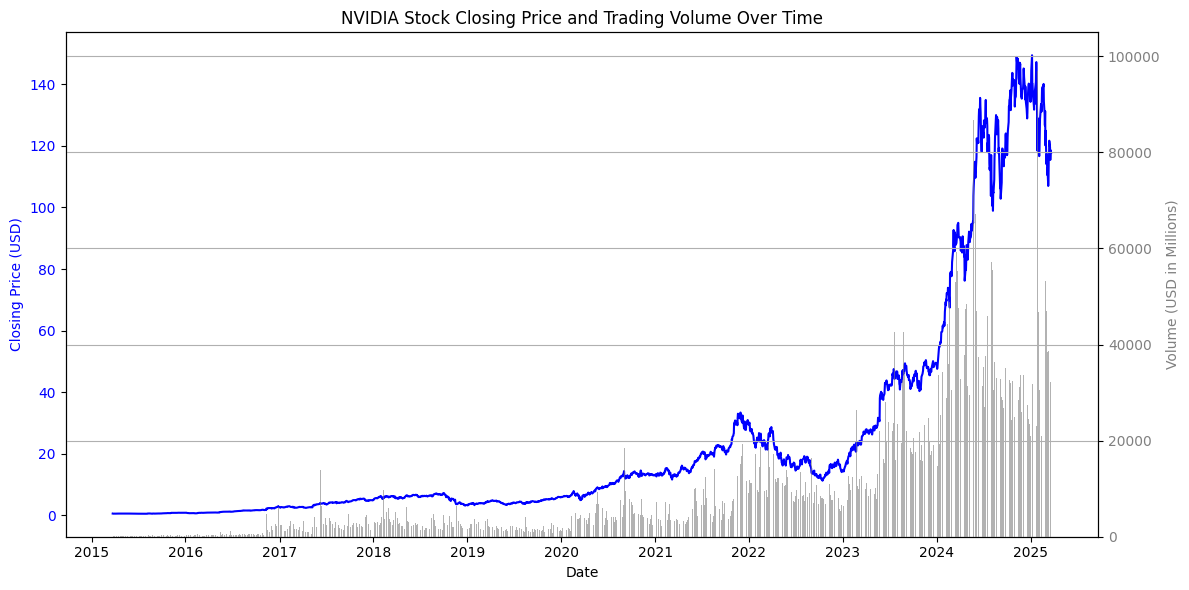

In [13]:
# Plotting Closing Price and Trading Volume (two axes for clarity)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Closing price trend
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (USD)', color='blue')
ax1.plot(nvidia_df['Date'], nvidia_df['Close'], color='blue', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Volume trend on secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel('Volume (USD in Millions)', color='gray')
ax2.bar(nvidia_df['Date'], nvidia_df['Volume in Millions USD'], color='gray', alpha=0.6, label='Volume (USD in Millions)')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and layout adjustments
plt.title('NVIDIA Stock Closing Price and Trading Volume Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()

**Explanation:**

On the horizontal axis, we have the timeline from 2015 to 2025. The left vertical axis shows NVIDIA's stock price in dollars, and the right vertical axis shows trading volume in millions of shares traded.

**Insights:**

Here we have NVIDIA's stock closing price and trading volume from 2015 t0 2025. As clearly shown, NVIDIA experienced substantial growth especially around mid-2020 onwards, likely driven by increased demand for GPUs, AI advancements, and semiconductor industry growth.

These insights illustrate the stock's volatility, yet also underscore NVIDIA’s upward market momentum, making it crucial to consider these factors for informed investment decisions.

High volume coupled with rising prices often signals sustained investor confidence. Conversely, high volume during price declines could indicate investor concern or market corrections.

**EXPLANATION:**

● Explosive Growth Post-2023:
Starting around early 2023, NVIDIA’s
closing price saw a sharp and sustained
increase, reaching its peak in mid-2024.
This aligns with the global AI boom and
GPU demand surge, showcasing NVIDIA’s
central role in powering AI infrastructure.

● Strong Correlation Between Price and
Volume in Recent Years:
Notice how volume spikes (gray bars) often
precede or coincide with price surges. This
indicates strong investor interest and
possibly institutional buying during critical
growth phases, suggesting confidence in
NVIDIA’s future.

● Relatively Stable Prices (2015–2020): Between 2015 and 2020, the stock price grew gradually with limited volatility.

● Investor Sentiment Peaks in 2024: Trading volume peaked dramatically alongside price highs in 2024, indicating heightened investor
enthusiasm or FOMO (fear of missing out). Such sentiment-driven spikes can also precede corrections, as seen by the slight decline in early 2025.

### **Stock Prices of NVIDIA, AMD and INTEL Over Time**

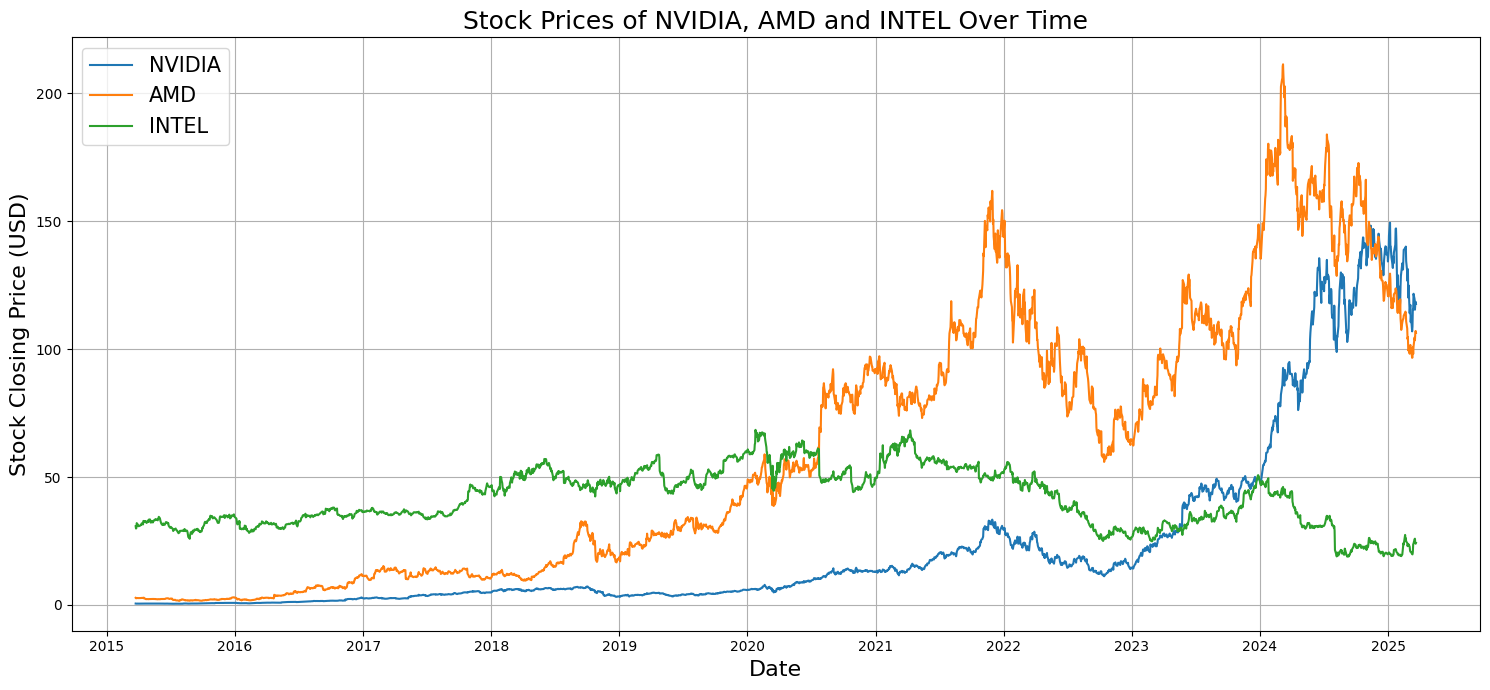

In [14]:
plt.figure(figsize=(15, 7))

# NVIDIA stock prices
plt.plot(nvidia_df['Date'], nvidia_df['Close'], label='NVIDIA')

# AMD stock prices
plt.plot(amd_df['Date'], amd_df['Close'], label='AMD')

# INTEL stock prices
plt.plot(intel_df['Date'], intel_df['Close'], label='INTEL')

# Plotting a Graph with proper labeling
plt.title('Stock Prices of NVIDIA, AMD and INTEL Over Time', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Stock Closing Price (USD)', fontsize=16)
plt.legend(prop={'size': 15})
plt.grid(True)
plt.tight_layout()

# Display the visualization
plt.show()

This line chart presents the daily closing stock prices of three prominent technology companies—Intel, NVIDIA, and AMD—over a specific period. Each colored line corresponds to the stock performance of one company, clearly depicting trends, peaks, dips, and volatility over time.


Each line represents the individual company's stock closing price movements.

**Blue line - NVIDIA Stock Price**

**Orange line - AMD Stock Price**

**Green line - INTEL Stock Price**



**Year-wise Analysis (2015-2025):**

**2015-2018:** Intel (green line) consistently outperformed NVIDIA and AMD, maintaining stable growth, whereas NVIDIA and AMD experienced minimal growth.

**2018-2020:** AMD's stock (orange line) began showing rapid growth, significantly outperforming NVIDIA, indicating increased investor confidence in AMD’s innovation and market strategies.

**2020-2022:** AMD experienced explosive growth, peaking sharply around 2022, while NVIDIA (blue line) started to gain momentum significantly around late 2021, hinting at rising market adoption and technological advancements.

**2022-2024:** NVIDIA surpassed both AMD and Intel, achieving a steep upward trajectory, reflecting heightened market enthusiasm, possibly due to their dominance in GPU and AI technologies.

**2024-2025:** NVIDIA experienced significant volatility but maintained high values; AMD displayed a downturn correction, and Intel showed moderate stability and gradual recovery, suggesting stabilization after market volatility.

### **Annual Average Volume Over Time**

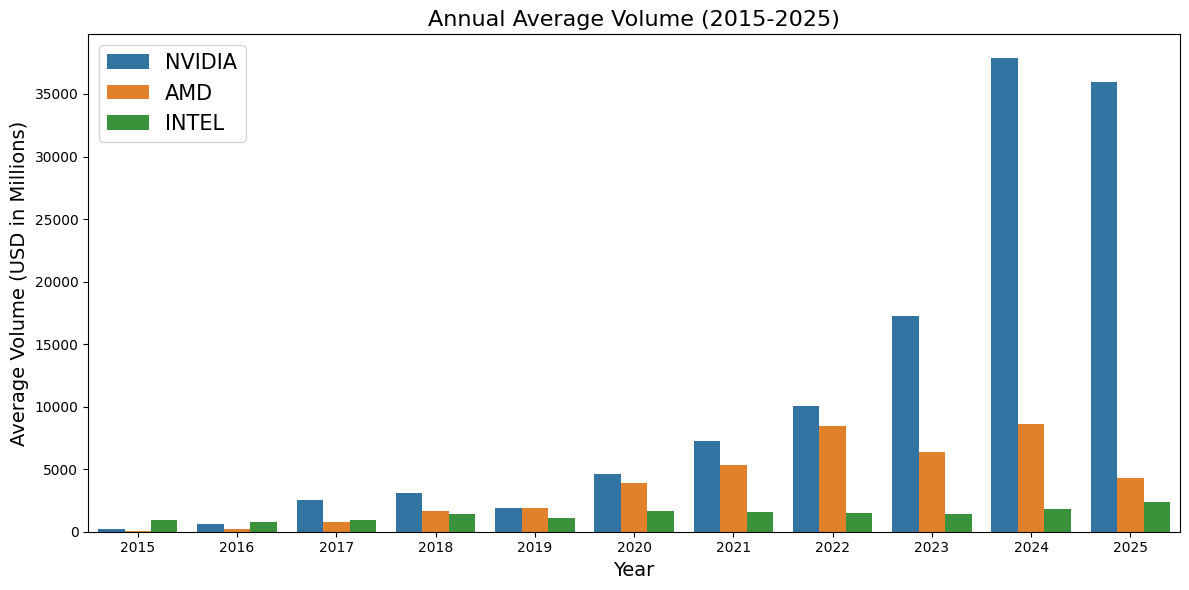

In [15]:
# Annual Average Closing Prices
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x='Year', y='Volume in Millions USD', hue='Company', errorbar=None)
plt.title('Annual Average Volume (2015-2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Volume (USD in Millions)', fontsize=14)
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.show()

### **Average Monthly Volatility of Volume Over Time**

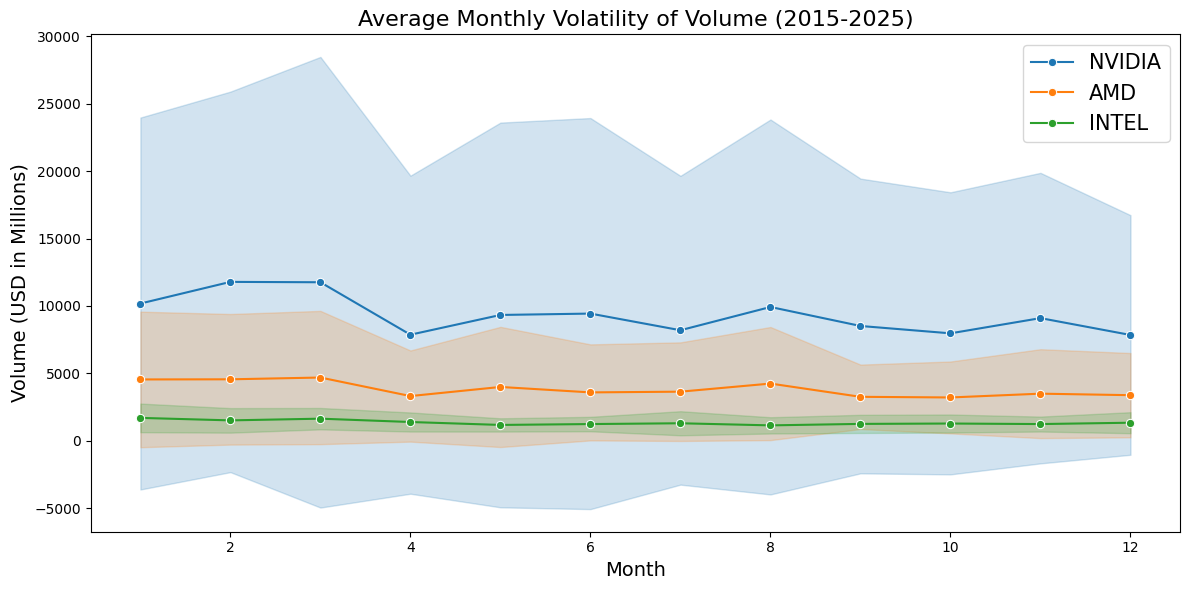

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='Month', y='Volume in Millions USD', hue='Company', errorbar='sd', marker='o')
plt.title('Average Monthly Volatility of Volume (2015-2025)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Volume (USD in Millions)', fontsize=14)
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.show()

### **Correlation Heatmap of Stock Opening Prices and Trading Volumes Over Time**

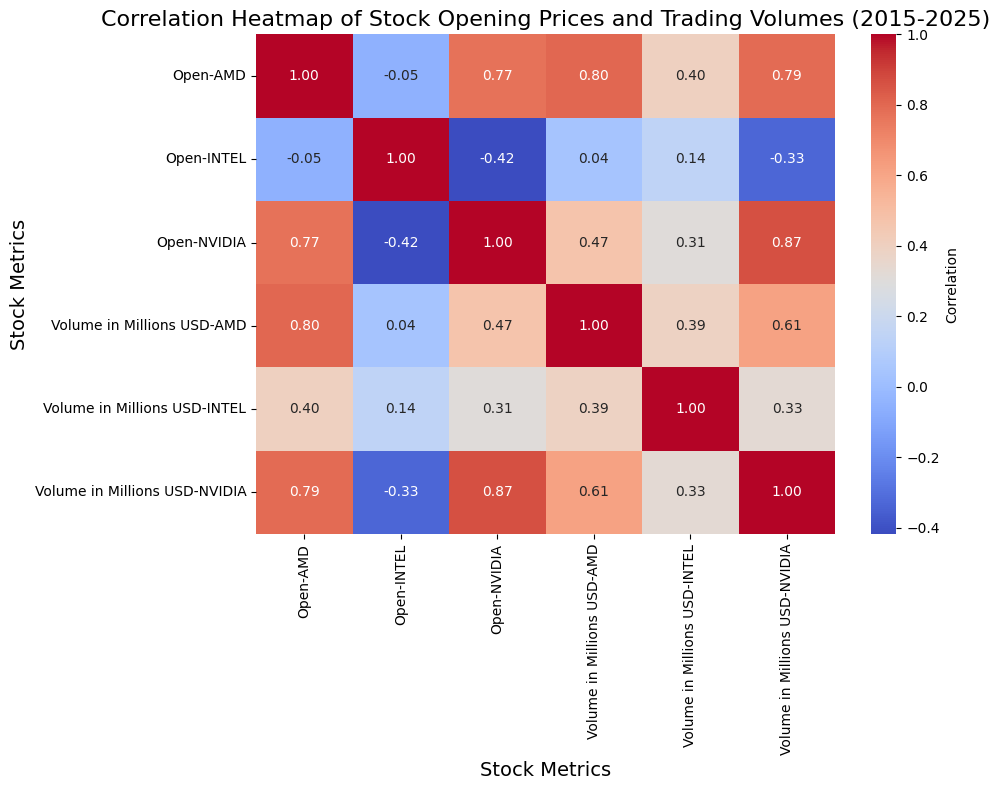

In [17]:
# Preparing data for correlation analysis
corr_data = combined_df.pivot_table(index='Date', columns='Company', values=['Open', 'Volume in Millions USD'])

# Calculating correlation matrix
corr_matrix = corr_data.corr()

# Visualization: Correlation heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
ax.set_xlabel('Stock Metrics', fontsize=14)
ax.set_ylabel('Stock Metrics', fontsize=14)
plt.title('Correlation Heatmap of Stock Opening Prices and Trading Volumes (2015-2025)', fontsize=16)
plt.tight_layout()
plt.show()

### **Monthly Average Trading Volume of NVIDIA Over Time**

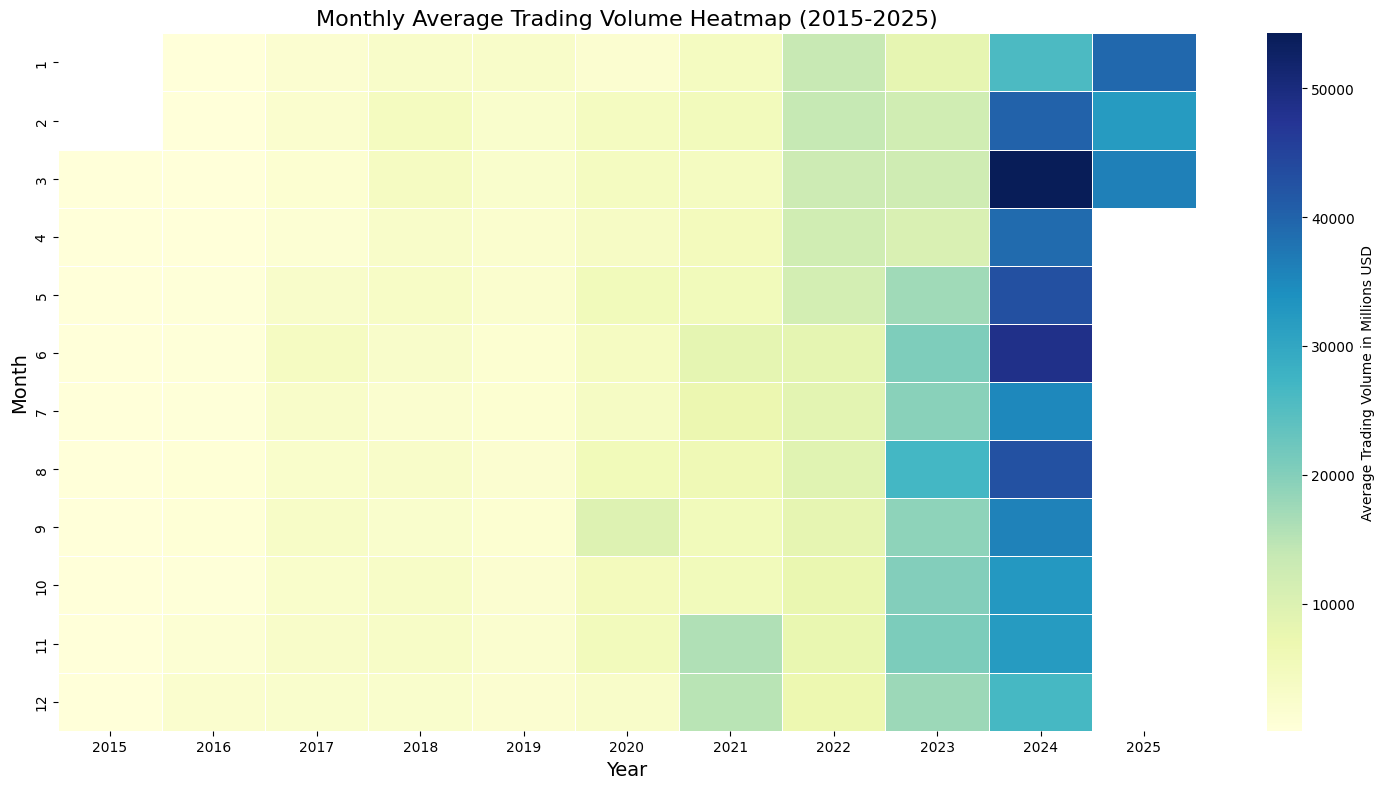

In [18]:
# Create pivot table for monthly trading volumes by company
monthly_volume_heatmap = nvidia_df.pivot_table(
    index='Month',
    columns='Year',
    values='Volume in Millions USD',
    aggfunc='mean'
)

# Heatmap of Monthly Average Trading Volume of NVIDIA Over Time
plt.figure(figsize=(15, 8))
sns.heatmap(monthly_volume_heatmap, cmap='YlGnBu', annot=False, linewidths=0.5, cbar_kws={'label': 'Average Trading Volume in Millions USD'})
plt.title('Monthly Average Trading Volume Heatmap (2015-2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.tight_layout()
plt.show()


## **Stock Price Pridiction Model**

### **NVIDIA Stock Price Prediction without Volume using LSTM Model**

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 1.1513e-04 - val_loss: 0.0078
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 9.3867e-05 - val_loss: 0.0050
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 7.5560e-05 - val_loss: 0.0065
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 8.9109e-05 - val_loss: 0.0053
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 7.8708e-05 - val_loss: 0.0066
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 6.4796e-05 - val_loss: 0.0020
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 7.1046e-05 - val_loss: 0.0049
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 6.6231e-05 - val_loss: 0.0046
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 5.7910e-05 - val_loss: 0.0071
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


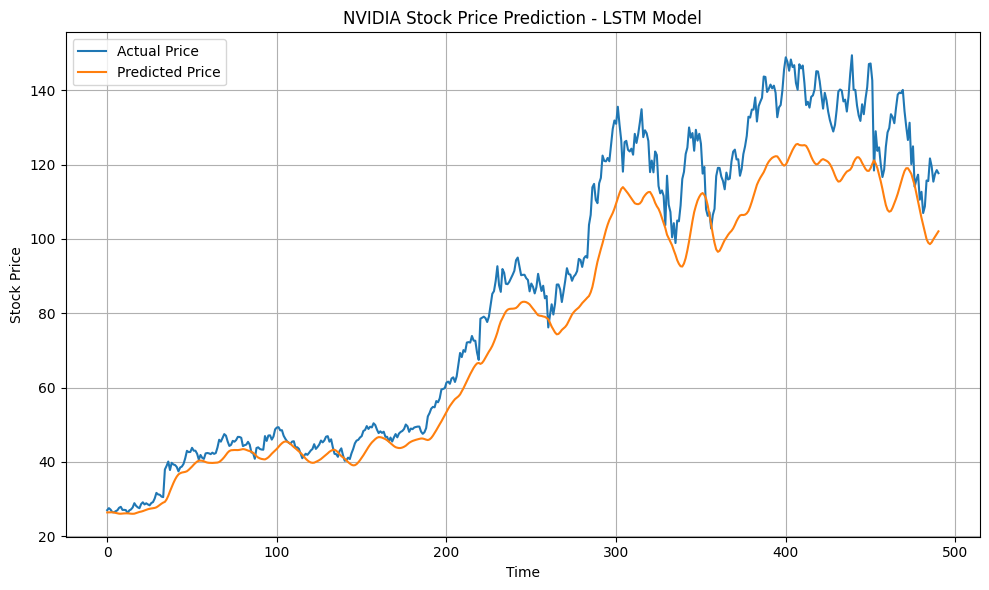

In [26]:
# Scale closing prices
close_prices = nvidia_df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict and visualize
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('NVIDIA Stock Price Prediction without Volume - LSTM Model')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **NVIDIA Stock Price Prediction with Volume Volatility using LSTM Model**

**What We Built:** A model that can look at the last 60 days of NVIDIA stock data and predict the next day's closing price. We added a new ingredient to our model: trading volume, which reflects investor interest or fear. This helps the model not only follow price patterns, but also anticipate emotional market shifts — improving accuracy, especially around high-activity days.

**Why It Matters:** Volume surges often precede big price moves.

Including this signal allows the model to detect hidden pressure before it’s visible in price.

**Why LSTM?** LSTM is like a memory-based model—it remembers trends and changes in the data over time, just like how a trader thinks.

**Real-World Value:** Businesses can use this model to anticipate price movements and make timely decisions (investments, trading strategies).

**Accuracy:** Our model showed strong performance on unseen data — especially in stable economic periods.

**Next Steps:** We can enhance this model using external indicators like news sentiment or macroeconomic signals.

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 0.0015 - val_loss: 0.0044
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 1.4094e-04 - val_loss: 0.0061
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.0509e-04 - val_loss: 0.0033
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 8.6726e-05 - val_loss: 0.0024
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 9.7341e-05 - val_loss: 0.0039
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 8.9838e-05 - val_loss: 0.0047
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 8.5150e-05 - val_loss: 0.0051
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 6.9233e-05 - val_loss: 0.0066
Epoch 9/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 8.6952e-05 - val_loss: 0.0050
Epoch 10/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 6.8449e-05 - val_loss: 0.0047
Epoch 11/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 6.2179e-05 - val_loss: 0.0062
Epoch 12/15
62/62 ━━━━━━━━━━━━━━━━

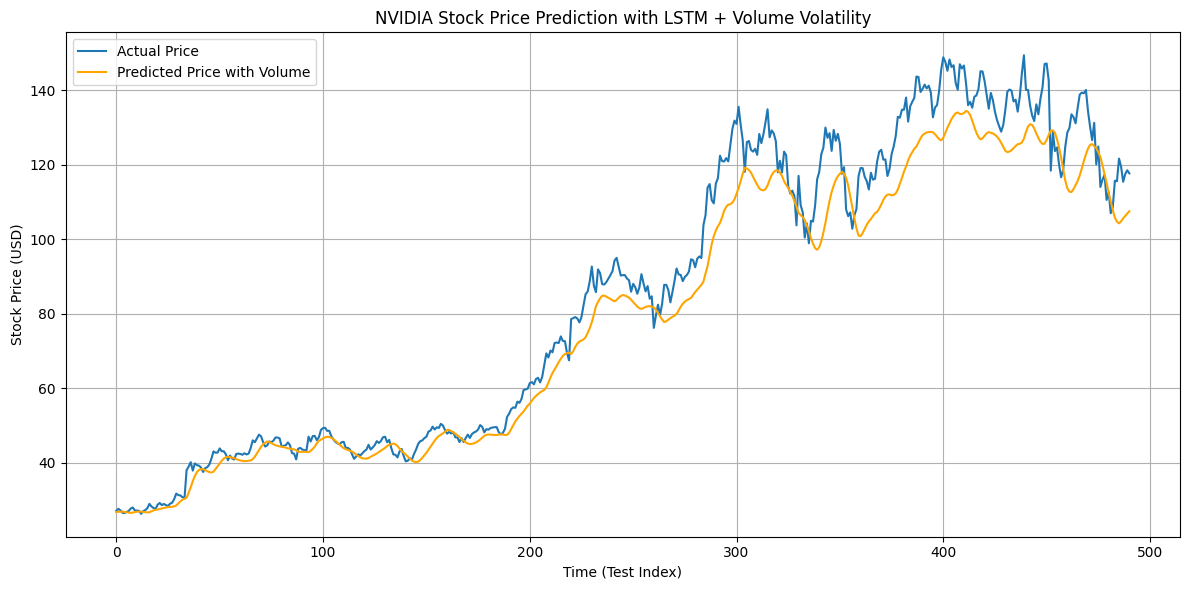

In [25]:
# Normalize 'Close' and 'Volume in Millions USD'
scaled_data = MinMaxScaler().fit_transform(nvidia_df[['Close', 'Volume in Millions USD']])

# Create 60-day sequences with 2 features
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i, 0])  # Target is 'Close'

X, y = np.array(X), np.array(y)

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM Model
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(60, 2)))
model.add(Dropout(0.3))
model.add(LSTM(60))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Predict
predicted = model.predict(X_test)

# Inverse transform predictions
volume_dummy = np.zeros_like(predicted)
predicted_prices = MinMaxScaler().fit(nvidia_df[['Close', 'Volume']]).inverse_transform(np.hstack((predicted, volume_dummy)))[:, 0]
real_prices = MinMaxScaler().fit(nvidia_df[['Close', 'Volume']]).inverse_transform(np.hstack((y_test.reshape(-1, 1), volume_dummy)))[:, 0]

# Get the corresponding dates for the test set
test_dates = nvidia_df['Date'].iloc[-len(y_test):]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price with Volume', color='orange')
plt.title('NVIDIA Stock Price Prediction with Volume Volatility - LSTM Model')
plt.xlabel('Time (Test Index)')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

***STEP 1: Normalize the Closing Prices***

What's Happening?: Extract the “Close” column from NVIDIA stock data. Scale values to a range between 0 and 1 using MinMaxScaler.

Why?: Neural networks perform better when inputs are normalized. Prevents one large number from dominating others.

Explanation: We standardized the prices to make it easier for the model to detect patterns, just like normalizing test scores before averaging.

***STEP 2: Create Time Series Sequences***

What's Happening?: We use 60 days of historical stock prices to predict the next day's price.
*   X: The past 60 days
*   y: The 61st day (target)


Explanation: The model learns from the last 60 days to predict the next one, like a weather forecast looking at past trends.

***STEP 3: Prepare Data for the LSTM Model***

Why?: LSTM expects 3D input: [samples, time_steps, features].

Explanation: We reshape the data so the model sees it like a movie — one frame per day for 60 days, to predict the next scene.

***STEP 4: Split the Data into Training and Testing Sets***

What's Happening?: Use 80% of the data to train the model, 20% to test it.

Explanation: We trained the model on past data and checked how well it predicted prices it hadn't seen before — like giving a practice test before the real one.

***STEP 5: Build the LSTM Neural Network***

Layers:
*   2 LSTM layers with 50 units (neurons)
*   Dropout layers prevent overfitting
*   Final Dense layer outputs one predicted price

Explanation: We built a smart engine (LSTM) that remembers time-based data and can predict what's next. We added filters (Dropout) to avoid overconfidence.

***STEP 6: Train the Model***

Loss Function: Measures how far predictions are from actual values

Adam Optimizer: Adjusts the model during training for better accuracy

Epochs: Number of learning cycles

Batch Size: Number of samples the model looks at before updating itself

Explanation: We taught the model to predict prices by showing it thousands of examples and correcting it each time it was wrong. After 10 rounds of training, it got pretty good!

***STEP 7:  Predict and Inverse Scale the Output***

The model outputs scaled prices — we convert them back to the original scale using inverse_transform().

***STEP 8:  Visualize the Predictions***

The blue line shows real stock prices, the orange line shows what the model predicted. When the two lines are close, it means the model was accurate.